# Model Selection

## Objective - To predict divorce with the best model

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

SEED = 0

### Step 1: Load in the required data

In [2]:
df = pd.read_csv("divorce.csv")
df.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


### Step 2: Data Pre-processing and Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [4]:
# Let us first clean our data
# 1) Look for any missing values
df.isna().any()

Atr1     False
Atr2     False
Atr3     False
Atr4     False
Atr5     False
Atr6     False
Atr7     False
Atr8     False
Atr9     False
Atr10    False
Atr11    False
Atr12    False
Atr13    False
Atr14    False
Atr15    False
Atr16    False
Atr17    False
Atr18    False
Atr19    False
Atr20    False
Atr21    False
Atr22    False
Atr23    False
Atr24    False
Atr25    False
Atr26    False
Atr27    False
Atr28    False
Atr29    False
Atr30    False
Atr31    False
Atr32    False
Atr33    False
Atr34    False
Atr35    False
Atr36    False
Atr37    False
Atr38    False
Atr39    False
Atr40    False
Atr41    False
Atr42    False
Atr43    False
Atr44    False
Atr45    False
Atr46    False
Atr47    False
Atr48    False
Atr49    False
Atr50    False
Atr51    False
Atr52    False
Atr53    False
Atr54    False
Class    False
dtype: bool

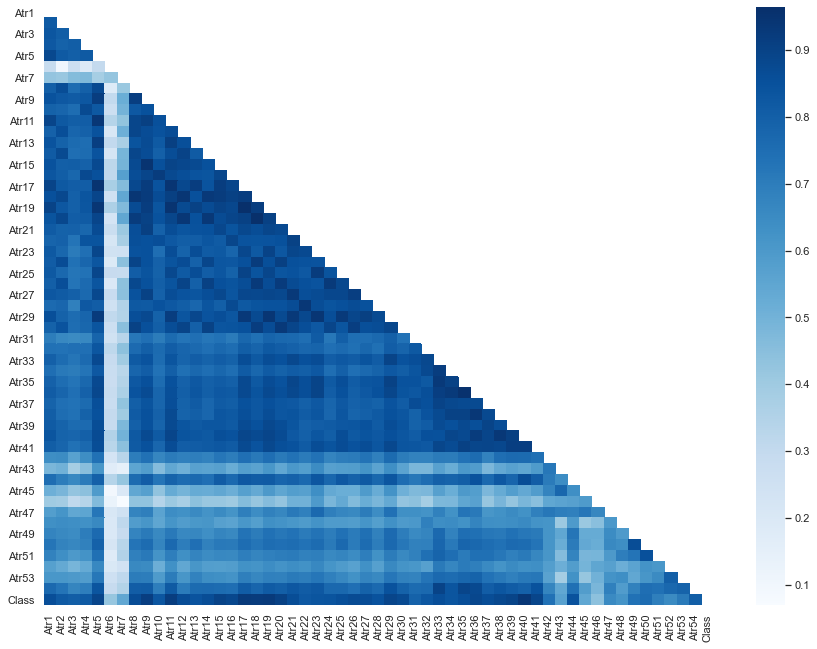

In [5]:
sns.set(style="white")

matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(15,11))

_ = sns.heatmap(df.corr(), mask=matrix, cmap='Blues')

In [6]:
# Pearson correlation coefficient
corr = df.corr()["Class"].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)

# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.9]
relevant_features

Atr40    0.938684
Atr17    0.929346
Atr19    0.928627
Atr18    0.923208
Atr11    0.918386
Atr9     0.912368
Atr20    0.907008
Atr15    0.901220
Name: Class, dtype: float64

### Let's analyze the data further and see how the independent variables are related to divorce here!

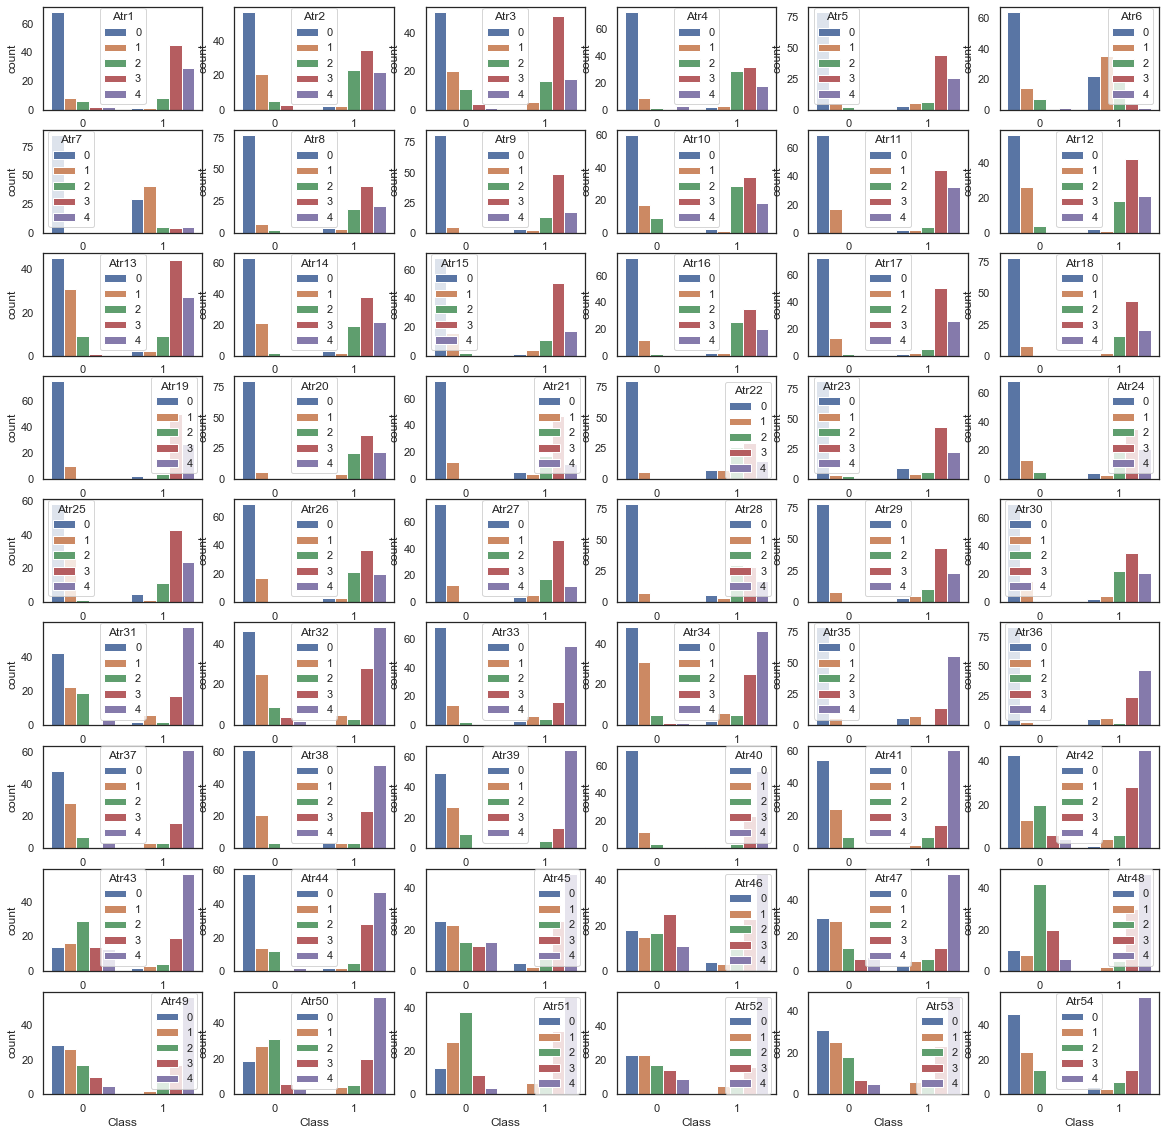

In [7]:
# Let's look at all the attributes and their impact on divorce

# Removing class variable for analysis
attributes = df[:-1]

fig, ax = plt.subplots(9,6,figsize=(20,20))
for axi, atr in zip(ax.flat,attributes):
    sns.countplot(x=df.Class,hue=df[atr],ax=axi)

### Step 3: Split the data and train the models

In [8]:
X=df.drop('Class',axis=1)
y=df['Class']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

#### Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Baseline model using Logistic Regression

In [10]:
logreg = LogisticRegression()

In [11]:
# K-fold cross validation using F1-score as scorer
scores = cross_val_score(logreg, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='f1_macro')
print('F1 scores:', scores)
print('Mean & standard deviation: {:.2} {:.2f}'.format(scores.mean(), np.std(scores)))

F1 scores: [1.         1.         0.95974235 1.         0.96      ]
Mean & standard deviation: 0.98 0.02


#### Model Selection - Train and evaluate multiple models

In [12]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

In [13]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

In [14]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-2, 2, 5)}

gs_logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_logreg.fit(X_train_scaled, y_train)

Wall time: 5.57 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [15]:
# Best model hyperparameters and score
print(gs_logreg.best_estimator_)
print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

LogisticRegression(C=0.01, n_jobs=-1)
{'C': 0.01, 'penalty': 'l2'}
0.9839484702093397


In [16]:
# Using best estimator found by GridSearchCV
logreg = gs_logreg.best_estimator_
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, n_jobs=-1)

In [17]:
y_pred = logreg.predict(X_test_scaled)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



In [19]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state=0)

In [21]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 25],
              'min_samples_split': [5, 10, 15]}

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=5,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

Wall time: 47 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 25],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [22]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.9839484702093397


In [23]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=0)

In [24]:
y_pred = rf.predict(X_test_scaled)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



In [26]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [27]:
# Multi-Level Perceptron (stochastic iterative)
mlp = MLPClassifier(solver='sgd')

In [28]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'hidden_layer_sizes': [(3,3),
                                     (2),
                                     (3)], 
              'alpha': np.logspace(-4, -1, 4),
              'max_iter': [400, 450, 500, 550]}

gs_mlp = GridSearchCV(mlp,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_mlp.fit(X_train_scaled, y_train)

Wall time: 26 s


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(solver='sgd'), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'hidden_layer_sizes': [(3, 3), 2, 3],
                         'max_iter': [400, 450, 500, 550]},
             scoring='f1_macro')

In [29]:
# Best model hyperparameters and score
print(gs_mlp.best_estimator_)
print(gs_mlp.best_params_)
print(gs_mlp.best_score_)

MLPClassifier(alpha=0.001, hidden_layer_sizes=2, max_iter=450, solver='sgd')
{'alpha': 0.001, 'hidden_layer_sizes': 2, 'max_iter': 450}
0.9919484702093397


In [30]:
# Using best estimator found by GridSearchCV
mlp = gs_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=2, max_iter=450, solver='sgd')

In [31]:
y_pred = mlp.predict(X_test_scaled)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



In [33]:
models.append('Multilevel Perceptron')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, mlp.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [34]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [35]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
0,Logistic Regression,0.984252,0.953488,0.958333,0.952381,0.953261
1,Random Forest,1.000000,0.953488,0.958333,0.952381,0.953261
2,Multilevel Perceptron,0.984252,0.953488,0.958333,0.952381,0.953261


### Step 4: Predict and Evaluate with the best model

In [36]:
# Prediction by selected model
y_pred = logreg.predict(X_test_scaled)

In [37]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



Text(30.5, 0.5, 'Predicted')

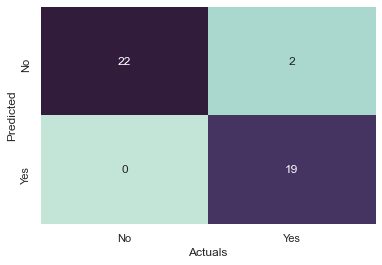

In [38]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Step 5: Get and plot features importances

In [39]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

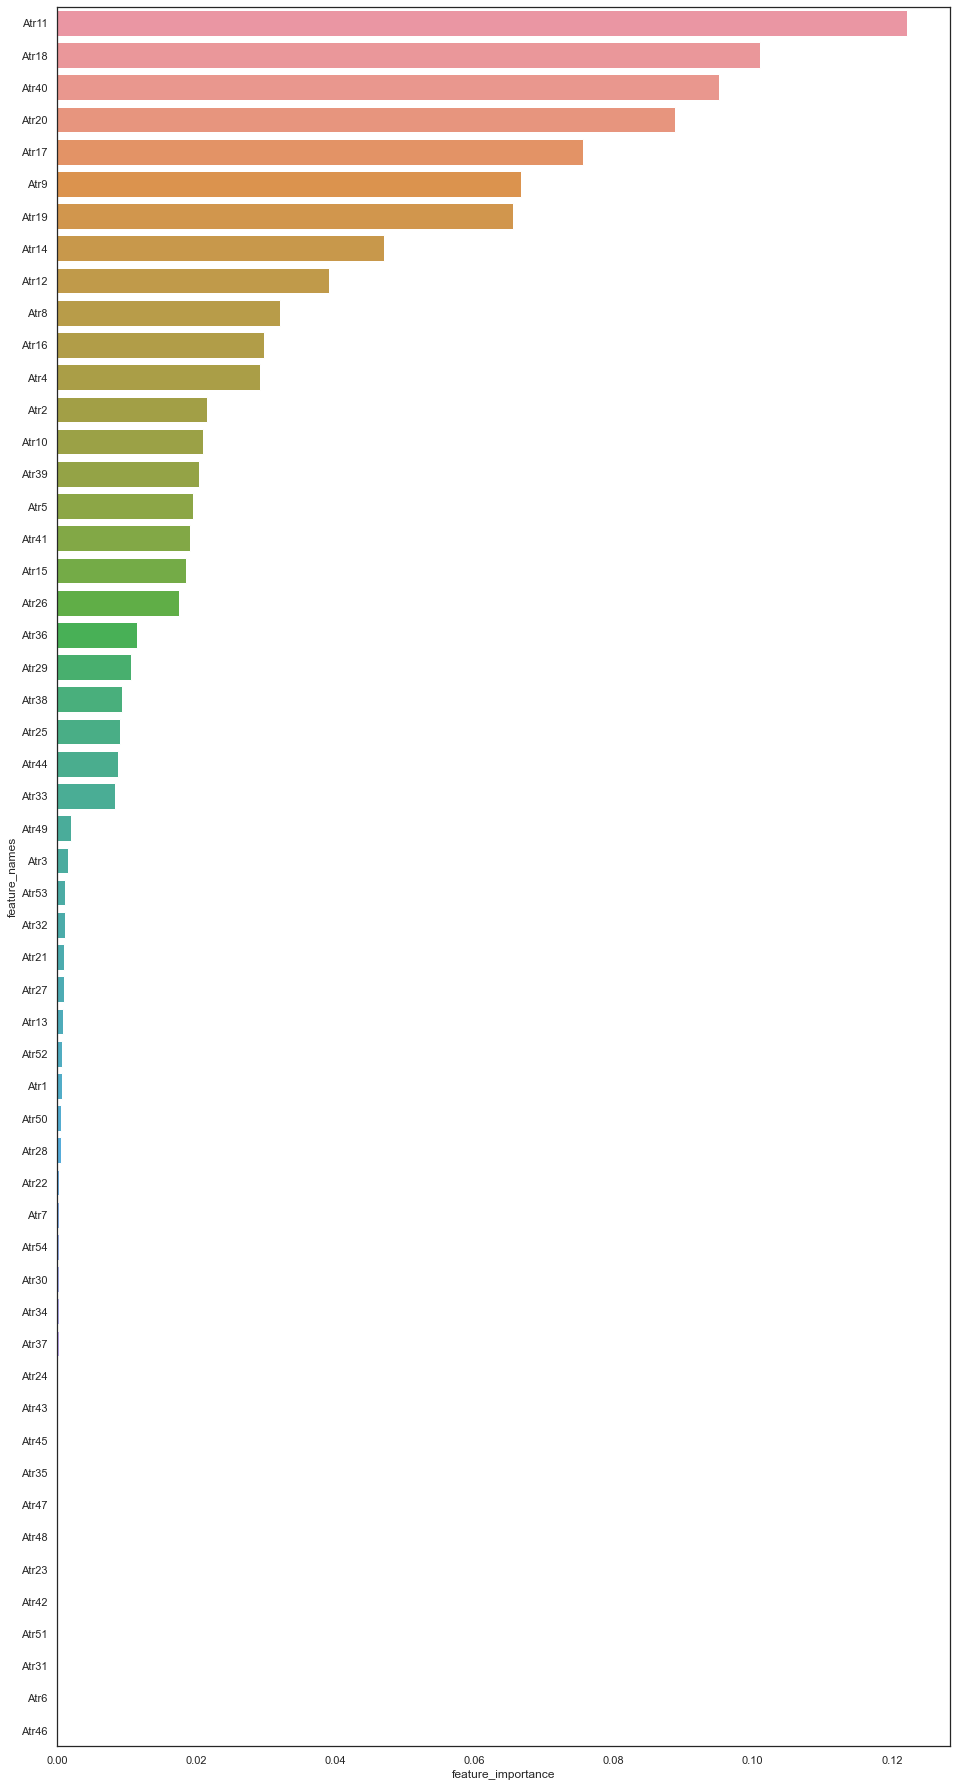

In [40]:
plt.figure(figsize=(16,32))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])